<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/DieukhienNhietDo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


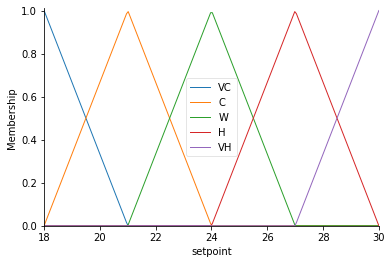

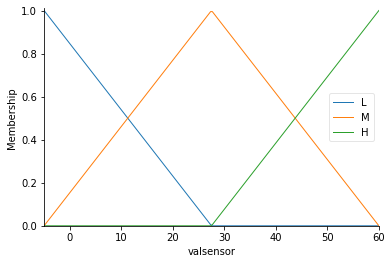

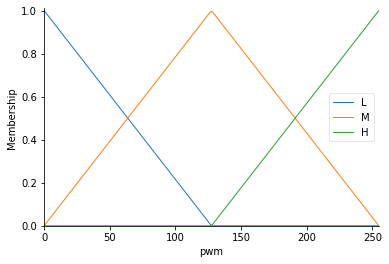

In [42]:
import numpy as np

import skfuzzy.control as ctrl

universe= np.linspace(18, 30, 200) 
universe1=np.linspace (-5, 60, 200)
universe2=np.linspace (0, 255, 200)

setpoint=ctrl.Antecedent(universe, 'setpoint') 
valsensor = ctrl.Antecedent(universe1,'valsensor')
pwm=ctrl.Consequent(universe2,'pwm')

name1s=['VC', 'C', 'W', 'H', 'VH'] 
name2s=['L','M', 'H'] 
setpoint.automf(names=name1s)
valsensor.automf(names=name2s)
pwm.automf(names=name2s)
setpoint.view()
valsensor.view()
pwm.view()

In [43]:
rule0=ctrl.Rule(antecedent=((setpoint['VC'] & valsensor['L'])|

(setpoint['VC'] & valsensor['M']) |

(setpoint['VC'] & valsensor['H'])|(setpoint['C'] & valsensor['L'])|(setpoint['C'] & valsensor['M'])|(setpoint['W'] & valsensor['L'])), consequent=pwm['L'], label='rule L')

rule1=ctrl.Rule(antecedent=((setpoint['C'] & valsensor['H'])|
(setpoint['W'] & valsensor['M'])|
(setpoint['W'] & valsensor['H']) |
 (setpoint['H'] & valsensor['L'])),

consequent=pwm['M'], label='rule M')

rule2 = ctrl.Rule(antecedent=((setpoint [ 'H'] & valsensor['M']) |

(setpoint['H'] & valsensor['H']) | 

(setpoint['VH'] & valsensor['L'])|

(setpoint['VH'] & valsensor['M']) |

(setpoint['VH'] & valsensor['H'])),

consequent=pwm['H'], label='rule H')

In [44]:
system =ctrl.ControlSystem(rules=[rule0, rule1, rule2])

sim = ctrl.ControlSystemSimulation(system, flush_after_run=61*61 +1)

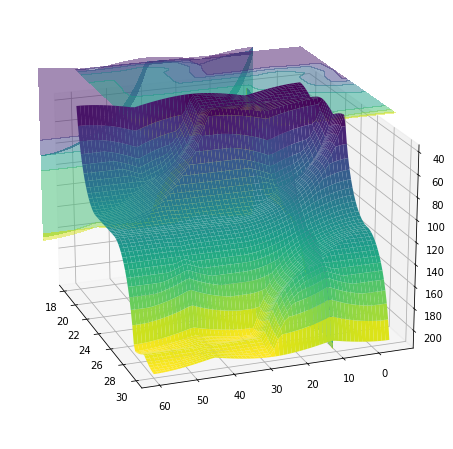

In [46]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
upsampled = np.linspace(18, 30, 60) 
upsampled1 = np.linspace(-5, 60, 60) 
x, y = np.meshgrid (upsampled, upsampled1) 
z = np. zeros_like(x)

for i in range(60):

  for j in range(60): 
    sim.input['setpoint'] = x[i, j]

    sim.input['valsensor'] = y[i, j]

    sim.compute()

    z[i, j] = sim.output['pwm']

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=8.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5)

cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)

ax.view_init(200, 200)